## Clone Github and Label Photos

In [1]:
!pip install --upgrade pyqt5 lxml

                                              0.0/6.8 MB ? eta -:--:--
                                              0.0/6.8 MB 660.6 kB/s eta 0:00:11
                                              0.0/6.8 MB 393.8 kB/s eta 0:00:18
                                              0.1/6.8 MB 939.4 kB/s eta 0:00:08
                                              0.1/6.8 MB 853.3 kB/s eta 0:00:08
     -                                        0.2/6.8 MB 1.1 MB/s eta 0:00:06
     -                                        0.2/6.8 MB 1.1 MB/s eta 0:00:06
     --                                       0.4/6.8 MB 1.3 MB/s eta 0:00:06
     --                                       0.4/6.8 MB 1.3 MB/s eta 0:00:06
     ---                                      0.6/6.8 MB 1.6 MB/s eta 0:00:04
     ---                                      0.6/6.8 MB 1.6 MB/s eta 0:00:04
     ---                                      0.6/6.8 MB 1.6 MB/s eta 0:00:04
     ----                                     0.8/6.8 MB 1.6 MB

In [2]:
import os

In [3]:
LABELIMG_PATH = os.path.join('LabelImg', 'labelimg') 
if not os.path.exists(LABELIMG_PATH): # make a file if not exists
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH} # clone repo to that file

In [4]:
if os.name == 'posix':
    !make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [28]:
!cd {LABELIMG_PATH} && python labelImg.py # run LabelImg

Not find:/data/predefined_classes.txt (optional)


## Image Pre Processing

### Change Brightness of all images

In [16]:
import cv2
import os

data_directory = "face_dataset"

# Get the list of image files in the directory
image_files = [file for file in os.listdir(data_directory) if file.lower().endswith((".jpg", ".jpeg", ".png"))]

# Convert images to grayscale
for file in image_files:
    image_path = os.path.join(data_directory, file)
    if not file.lower().endswith((".txt", ".xml")):  # Exclude label files based on their extensions
        image = cv2.imread(image_path)               # We don't need to greyscale labels
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        cv2.imwrite(image_path, grayscale_image)
    
print("Image conversion to grayscale is complete.")

Image conversion to grayscale is complete.


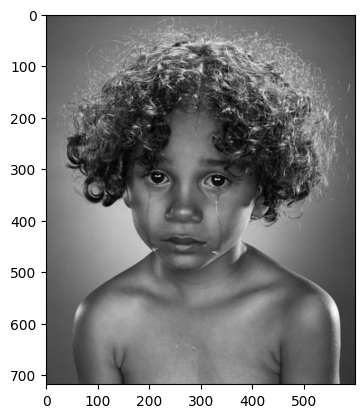

In [20]:
import matplotlib.pyplot as plt

image_path = "face_dataset/44.jpeg"

# Load the image
image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(image)
plt.show()

## Model

In [4]:
import tensorflow as tf
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

In [14]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.test.is_gpu_available()

False

In [10]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
anyio                        3.7.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.2
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2023.5.7
cffi                         1.15.1
chardet                      5.1.0
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
distlib                      0.3.6
e

## Resize images

In [1]:
import tensorflow as tf

data_directory = 'face_dataset\\train\\images\\'
image_files = tf.data.Dataset.list_files(data_directory + '*.png')  # Match PNG files
image_files = image_files.concatenate(tf.data.Dataset.list_files(data_directory + '*.jpeg'))  # Match JPEG files
image_files = image_files.concatenate(tf.data.Dataset.list_files(data_directory + '*.jpg'))  # Match JPG files

In [62]:
target_size = (500, 350)

def preprocess_image(file_path):
    # Read and decode the image file
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3)  # Specify the number of channels if known

    # Resize the image with padding
    image = tf.image.resize_with_pad(image, target_size[0], target_size[1])

    # Convert the image to grayscale
    image = tf.image.rgb_to_grayscale(image)

    # Normalize the image to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    
    return image

In [63]:
image_dataset = image_files.map(preprocess_image)

## Load images

In [64]:
image_files.as_numpy_iterator().next() # if it runs,it means we loaded images succesfully

b'face_dataset\\train\\images\\14.png'

In [65]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [66]:
image_files = image_files.map(load_image)

In [67]:
image_files.as_numpy_iterator().next()

array([[[127],
        [129],
        [130],
        ...,
        [179],
        [178],
        [177]],

       [[131],
        [133],
        [130],
        ...,
        [183],
        [177],
        [169]],

       [[132],
        [130],
        [124],
        ...,
        [179],
        [170],
        [164]],

       ...,

       [[118],
        [116],
        [117],
        ...,
        [120],
        [126],
        [133]],

       [[113],
        [113],
        [113],
        ...,
        [128],
        [130],
        [134]],

       [[110],
        [110],
        [113],
        ...,
        [133],
        [132],
        [139]]], dtype=uint8)

## View images

In [68]:
# Batch the preprocessed images
batched_image_dataset = image_dataset.batch(4)
# Convert the image iterator to a numpy iterator
image_generator = iter(batched_image_dataset)
# Retrieve the next batch of images
plot_images = next(image_generator)

In [69]:
plot_images = image_generator.next()

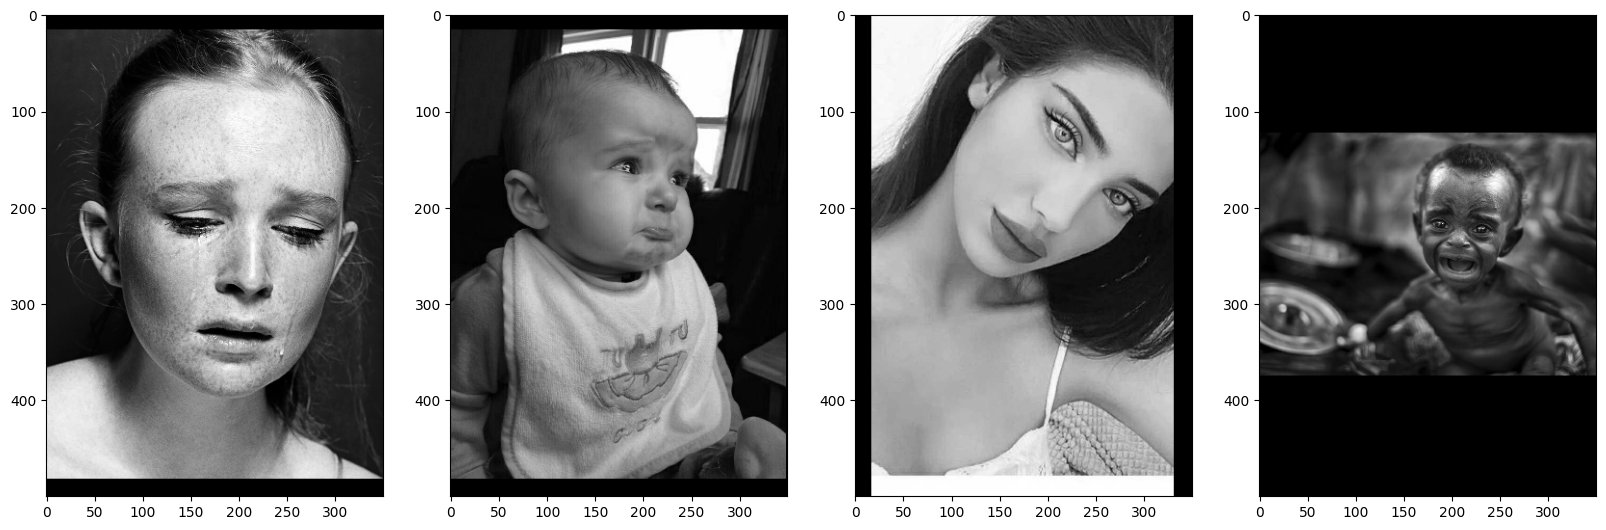

In [71]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image[:, :, 0], cmap='gray')  # Display the grayscale image using a grayscale colormap
plt.show()

## Apply image augmentation on images and labels

In [86]:
img = cv2.imread('face_dataset/train/images/42.jpeg')
img.shape # 44.jpeg -> (718,600), 
          # 42.jpeg -> (1101, 726)
          # each image has different shapes,we need to resize them all 

(1101, 726, 3)

In [7]:
import os
data_directory2 = 'face_dataset\\train\\images\\'
data_directory2 = 'face_dataset\\test\\images\\'

for filename in os.listdir(data_directory2):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Read the image
        image_path = os.path.join(data_directory2, filename)
        image = cv2.imread(image_path)

        # Resize the image to 50x50
        resized_image = cv2.resize(image, (50, 50))

        # Save the resized image with a new filename
        new_filename = 'resized_' + filename
        new_image_path = os.path.join(data_directory2, new_filename)
        cv2.imwrite(new_image_path, resized_image)

        print(f"Resized {filename} to 50x50 as {new_filename}")

Resized 144.jpeg to 50x50 as resized_144.jpeg
Resized 145.jpeg to 50x50 as resized_145.jpeg
Resized 146.jpeg to 50x50 as resized_146.jpeg
Resized 147.jpeg to 50x50 as resized_147.jpeg
Resized 148.jpeg to 50x50 as resized_148.jpeg
Resized 149.jpeg to 50x50 as resized_149.jpeg
Resized 150.jpeg to 50x50 as resized_150.jpeg
Resized 151.jpeg to 50x50 as resized_151.jpeg
Resized 152.jpeg to 50x50 as resized_152.jpeg
Resized 153.jpeg to 50x50 as resized_153.jpeg
Resized 154.jpeg to 50x50 as resized_154.jpeg
Resized 155.png to 50x50 as resized_155.png
Resized 156.jpeg to 50x50 as resized_156.jpeg
Resized 157.jpeg to 50x50 as resized_157.jpeg
Resized 158.jpeg to 50x50 as resized_158.jpeg
Resized 159.png to 50x50 as resized_159.png
Resized 160.png to 50x50 as resized_160.png
Resized 161.jpeg to 50x50 as resized_161.jpeg
Resized 162.jpeg to 50x50 as resized_162.jpeg
Resized 163.jpeg to 50x50 as resized_163.jpeg
Resized 164.jpeg to 50x50 as resized_164.jpeg
Resized 165.jpeg to 50x50 as resized_165

## Load images and labels

In [48]:
from PIL import Image
import xml.etree.ElementTree as ET

In [49]:
def load_images_from_dir(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path)
            
            # Check if the image is grayscale or color
            if image.mode == 'L':  # Grayscale image
                image = image.convert('RGB')  # Convert to RGB mode
            image = image.resize((50, 50))  # Resize the image to 50x50
            image = np.array(image)  # Convert the image to a numpy array
            images.append(image)
    return np.array(images)

In [52]:
def load_labels_from_dir(directory):
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.xml'):
            label_path = os.path.join(directory, filename)
            tree = ET.parse(label_path)  # Parse the XML file
            root = tree.getroot()  # Get the root element

            # Extract the label value from the XML
            label = root.find('object/name').text
            labels.append(label)
    return np.array(labels)

In [57]:
train_images_dir = 'face_dataset\\train\\images\\'
test_images_dir = 'face_dataset\\test\\images\\'
train_labels_dir = 'face_dataset\\train\\labels\\'
test_labels_dir = 'face_dataset\\test\\labels\\'

# Load train images and labels
train_images = load_images_from_dir(train_images_dir)
train_labels = load_labels_from_dir(train_labels_dir)

# Load test images and labels
test_images = load_images_from_dir(test_images_dir)
test_labels = load_labels_from_dir(test_labels_dir)

In [58]:
print('Number of test images:', train_images.shape[0])
print('Number of test labels:', train_labels.shape[0])

print('Number of test images:', test_images.shape[0])
print('Number of test labels:', test_labels.shape[0])

Number of test images: 142
Number of test labels: 142
Number of test images: 30
Number of test labels: 30


## Model

In [66]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [129]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(50, 50, 3)),  # input layer (1)
    keras.layers.Dense(16, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(4, activation='softmax') # output layer (3)
])

In [130]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [131]:
train_images = train_images.reshape(train_images.shape[0], 50, 50, 3)
test_images = test_images.reshape(test_images.shape[0], 50, 50, 3)

In [132]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [133]:
model.fit(train_images, train_labels_encoded, epochs=30)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/30
5/5 [==============================] - 0s 2ms/step - loss: 198.9133 - accuracy: 0.2183
Epoch 2/30
5/5 [==============================] - 0s 2ms/step - loss: 2.4515 - accuracy: 0.3873
Epoch 3/30
5/5 [==============================] - 0s 2ms/step - loss: 1.3856 - accuracy: 0.3944
Epoch 4/30
5/5 [==============================] - 0s 3ms/step - loss: 1.3850 - accuracy: 0.3944
Epoch 5/30
5/5 [==============================] - 0s 2ms/step - loss: 1.3841 - accuracy: 0.3944
Epoch 6/30
5/5 [==============================] - 0s 2ms/step - loss: 1.3832 - accuracy: 0.3944
Epoch 7/30
5/5 [==============================] - 0s 2ms/step - loss: 1.3821 - accuracy: 0.3944
Epoch 8/30
5/5 [==============================] - 0s 2ms/step - loss: 1.3810 - accuracy: 0.3944
Epoch 9/30
5/5 [==============================] - 0s 3ms/step - loss: 1.3799 - accuracy: 0.3944
Epoch 10/30
5/5 [==============================] - 0s 2ms/step - loss: 1.3786 - accuracy: 0.3944
Epoch 11/30
5/5 [====================

In [134]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_encoded, verbose=1) 

print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 108ms/step - loss: 1.3596 - accuracy: 0.4000
Test accuracy: 0.4000000059604645


## Show Predict

1/1 [==============================] - 0s 16ms/step


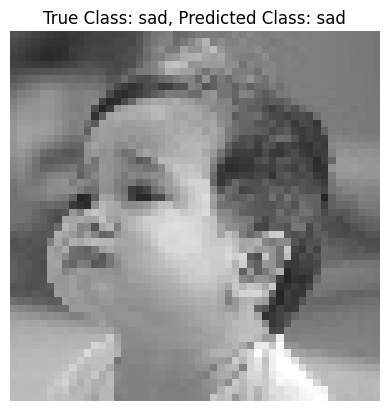

In [146]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ["happy", "sad", "angry", "neutral"]

# Assuming you have a trained model named 'model'
# Assuming you have a test image and its corresponding label
test_image = test_images[0]  # Take the first image from the test set
test_label = test_labels[0]  # Corresponding label for the test image

# Reshape the image back to its original shape if needed
# test_image = test_image.reshape(50, 50, 3)

# Make a prediction using the trained model
prediction = model.predict(np.expand_dims(test_image, axis=0))

# Get the predicted class index
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

# Display the image and predicted class
plt.imshow(test_image)
plt.title(f"True Class: {test_label}, Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()